# Reference Data-Driven (RDD) Metabolomics Analysis
## Dietary Patterns: Vegan vs. Omnivore Comparison

This notebook demonstrates the application of Reference Data-Driven (RDD) metabolomics to identify dietary signatures in human samples by comparing metabolite profiles between vegan and omnivore diets.

---

### Overview

**RDD Metabolomics** quantifies shared molecular features between samples and reference databases across hierarchical ontology levels. By counting matches at different taxonomic levels, we can identify food-derived metabolites and reconstruct dietary patterns.

**Key Concepts:**
- **RDD Counts**: Number of shared molecular clusters between a sample and reference food categories
- **Ontology Levels**: Hierarchical classification


**Dataset:**
- NIST human biological samples (vegan and omnivore participants)
- NIST food metabolomics reference library
- GNPS Molecular netowrking clustering output

---

## 1. Setup and Imports

Import the RDD package modules and set up visualization parameters.

In [3]:
# Import RDD package components
from rdd.RDDcounts import RDDCounts
from rdd.visualization import *
from rdd.analysis import *

# Standard visualization libraries
import matplotlib.pyplot as plt

---

## 2. Load GNPS Data and Generate RDD Counts



The `RDDCounts` class performs several operations automatically:

1. **Load molecular networking data** from GNPS (or local file as fallback)
2. **Match molecular clusters** between samples and reference food database
3. **Generate counts** at all ontology levels (0-6)
4. **Organize results** into a structured dataframe

### Parameters:
- `task_id`: GNPS job identifier for automatic data retrieval
- `gnps_network_path`: Local backup file path
- `sample_types`: 'simple' uses single ingredient food items
- `sample_groups`: Sample identifiers in the GNPS metadata (e.g., ["G1"])
- `reference_groups`: Reference identifiers in the GNPS metadata (e.g., ["G4"])


In [6]:
# Define data source parameters
gnps_food_nist_task = "74089e95b8df41b2af7c289869dc866f"  # GNPS task ID
gnps_food_nist_path = "../data/sample_gnps_vegomn.tsv"              # Local file backup

# Attempt to load data from GNPS, fallback to local file if needed
try:
    rdd_food_nist = RDDCounts(
        task_id=gnps_food_nist_task,
        gnps_2=False,                    # Use GNPS classic (not GNPS2)
        sample_types="simple",           # Use simplified reference ontology
        sample_groups=["G1"],            # Sample group identifiers from GNPS
        reference_groups=["G4"],         # Reference group identifiers from GNPS
        ontology_columns=None            # Use default food ontology structure
    )
    print("✓ Successfully loaded data from GNPS")
except Exception as e:
    print(f"An error occurred accessing GNPS. Will load data from file instead.")
    rdd_food_nist = RDDCounts(
        gnps_network_path=gnps_food_nist_path,
        sample_types="simple",
        sample_groups=["G1"],
        reference_groups=["G4"],
        ontology_columns=None
    )

An error occurred accessing GNPS. Will load data from file instead.


### Inspect the RDD Counts Data

The `counts` dataframe contains:
- **filename**: Sample identifier
- **reference_type**: Food category or specific reference name (depends on level)
- **count**: Number of shared molecular features between sample and reference
- **level**: Ontology hierarchy level (0 = most specific, higher = more general)
- **group**: Sample group label (currently generic, will be updated next)

In [13]:
# Display first few rows of RDD counts
rdd_food_nist.counts.head()

,filename,reference_type,count,level,group
0,NIST_POS_Samp_07-01,11442.G72441,9,0,G1
1,NIST_POS_Samp_07-01,11442.G72442,22,0,G1
2,NIST_POS_Samp_07-01,11442.G72443,34,0,G1
3,NIST_POS_Samp_07-01,11442.G72444,26,0,G1
4,NIST_POS_Samp_07-01,11442.G72445,14,0,G1


---

## 3. Update Sample Groups with Diet Labels

Replace generic group identifiers (G1, G4) with meaningful labels (Vegan, Omnivore).

### Metadata File Requirements:
The CSV file should contain:
- `filename`: Sample identifiers matching those in the RDD counts
- `new_group`: Diet classification (e.g., "Vegan", "Omnivore")

This step updates both the counts dataframe and the internal sample metadata.

In [17]:
# Update group labels from external metadata file
rdd_food_nist.update_groups(
    "../data/demo_gnps_metadata.csv",
    merge_column='new_group'
)

print("✓ Group labels updated successfully")

✓ Group labels updated successfully


---

## 4. Filtering RDD Counts: Example

The `filter_counts()` method allows subsetting the data by:
- **level**: Specific ontology hierarchy level
- **reference_types**: List of specific food categories to include
- **top_n**: Automatically select top N references by count (optional)

### Example: Apple Counts at Level 5

Level 5 represents specific food items. Here we examine RDD counts for "apple" across all samples, grouped by diet type.

In [18]:
# Example: Filter for apple references at level 5 (specific food level)
apple_counts = rdd_food_nist.filter_counts(
    level=5,
    reference_types=["apple"]
)

# Display the filtered results
apple_counts

,filename,reference_type,count,level,group
129312,NIST_POS_Samp_07-01,apple,118,5,Omnivore
129313,NIST_POS_Samp_07-02,apple,89,5,Omnivore
129314,NIST_POS_Samp_07-03,apple,101,5,Omnivore
129315,NIST_POS_Samp_08-01,apple,111,5,Omnivore
129316,NIST_POS_Samp_08-02,apple,104,5,Omnivore
129317,NIST_POS_Samp_08-03,apple,97,5,Omnivore
129318,NIST_POS_Samp_09-01,apple,86,5,Omnivore
129319,NIST_POS_Samp_09-02,apple,99,5,Omnivore
129320,NIST_POS_Samp_09-03,apple,89,5,Omnivore
129321,NIST_POS_Samp_10-01,apple,78,5,Vegan


These counts represent the number of molecular features in each sample that match apple reference spectra. Higher counts suggest greater apple consumption or presence of apple-derived metabolites.

---

## 5. Visualization: Food Category Proportions

### Objective
Compare RDD count proportions for major food categories between vegan and omnivore groups.


### Food Categories (Level 3)
We examine broad food groups:
- **vegetable/herb**: Plant-based vegetables and herbs
- **seafood**: Fish and marine products
- **dairy**: Milk and dairy products
- **meat**: Animal flesh products
- **fleshy fruit**: Fruits with soft pulp
- **legume**: Beans, peas, lentils

### Expected Patterns
- **Vegan**: Higher plant-based categories (vegetables, fruits, legumes)
- **Omnivore**: Higher animal product categories (dairy, meat, seafood)

/tmp/ipykernel_21295/2066313885.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='center')
/tmp/ipykernel_21295/2066313885.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='center')
/tmp/ipykernel_21295/2066313885.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='center')
/tmp/ipykernel_21295/2066313885.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='center')
/tmp/ipykernel_21295/2066313885.py:27: UserWarning: 

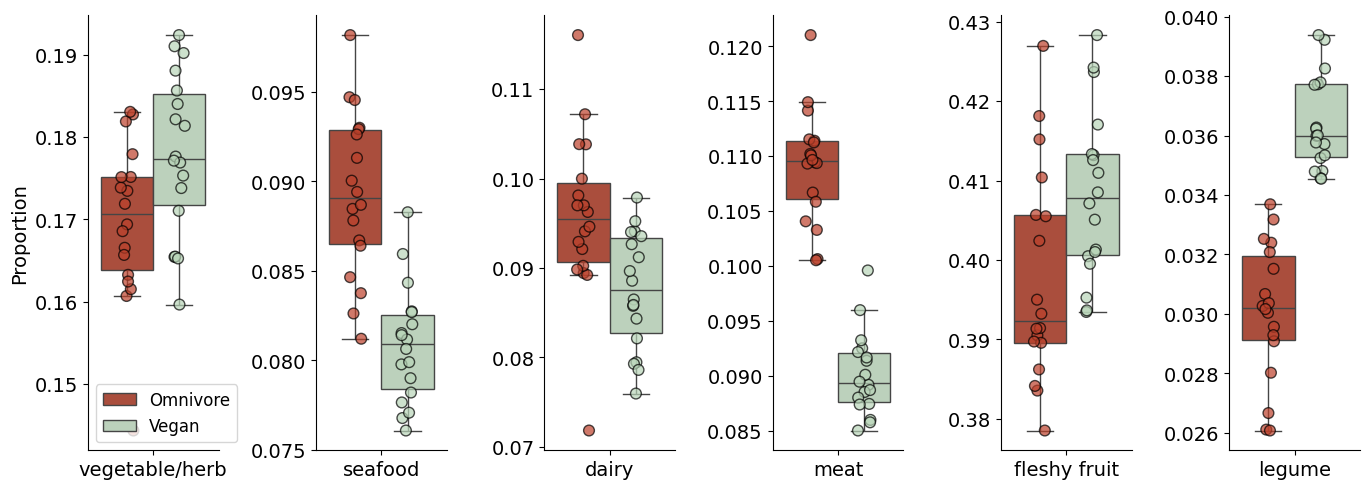

In [19]:
# Initialize visualizer with matplotlib backend
visualizer = Visualizer(MatplotlibBackend())

# Define food categories to compare (level 3 = broad categories)
references = ["vegetable/herb", "seafood", "dairy", "meat", "fleshy fruit", "legume"]
level = 3

# Create multi-panel figure
fig, axes = plt.subplots(1, len(references), figsize=(2.3 * len(references), 5))

# Generate boxplot for each food category
for idx, reference in enumerate(references):
    # Plot RDD proportions grouped by diet type
    visualizer.box_plot_RDD_proportions(
        rdd_food_nist, 
        level=level, 
        group_by=True, 
        reference_types=[reference],
        ax=axes[idx],
        group_colors={"Vegan": "#B8D5B8", "Omnivore": "#BC412B"}  # Custom colors
    )
    
    # Customize subplot appearance
    axes[idx].spines['top'].set_visible(False)
    axes[idx].spines['right'].set_visible(False)
    axes[idx].tick_params(axis='x', labelsize=14, rotation=0)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), ha='center')
    axes[idx].tick_params(axis='y', labelsize=14)
    
    # Style scatter point overlays
    for marker in axes[idx].collections[:2]:
        marker.set_edgecolor('black')
        marker.set_linewidth(1)
        marker.set_sizes([60])
    
    # Remove titles and x-labels for cleaner look
    axes[idx].set_title("")
    axes[idx].set_xlabel("")
    
    # Y-axis label only on first subplot
    if idx == 0:
        axes[idx].set_ylabel("Proportion", fontsize=14)
        axes[idx].legend(fontsize=12, loc='best')
    else:
        axes[idx].set_ylabel("")  # Keep independent y-scales
        # Remove redundant legends
        legend = axes[idx].get_legend()
        if legend:
            legend.remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

- **Dairy, meat & seafood**: Higher in omnivore samples (animal product consumption)
- **Vegetable/Herb, legume and fleshy fruit**: Higher in vegan samples (plant-based diet)


- Clear separation indicates distinct dietary patterns

---

## 6. Principal Component Analysis (PCA)

### Objective
Reduce high-dimensional RDD count data to visualize overall sample relationships and identify clustering by diet group.


**CLR tTransformation**: Centered log-ratio transformation for compositional data


### Level Selection
- **Level 0** (used here): Individual reference files - highest resolution

### Expected Outcome
If dietary metabolic signatures are distinct, vegan and omnivore samples should separate along principal components.

In [20]:
# Perform PCA on RDD counts at level 0 (file-level)
pca_df, explained_variance = perform_pca_RDD_counts(
    rdd_food_nist,
    level=0,
    n_components=3,
    apply_clr=True  # Apply centered log-ratio transformation
)

# Display variance explained by each component
print("PCA Variance Explained:")
print(f"  PC1: {100*explained_variance[0]:.2f}%")
print(f"  PC2: {100*explained_variance[1]:.2f}%")
print(f"  PC3: {100*explained_variance[2]:.2f}%")
print(f"\n  Cumulative (PC1+PC2): {100*sum(explained_variance[:2]):.2f}%")

PCA Variance Explained:
  PC1: 34.44%
  PC2: 12.21%
  PC3: 11.27%

  Cumulative (PC1+PC2): 46.65%


### Visualize PCA Results

The scatter plot shows sample positions in the reduced dimensional space, with colors indicating diet groups.

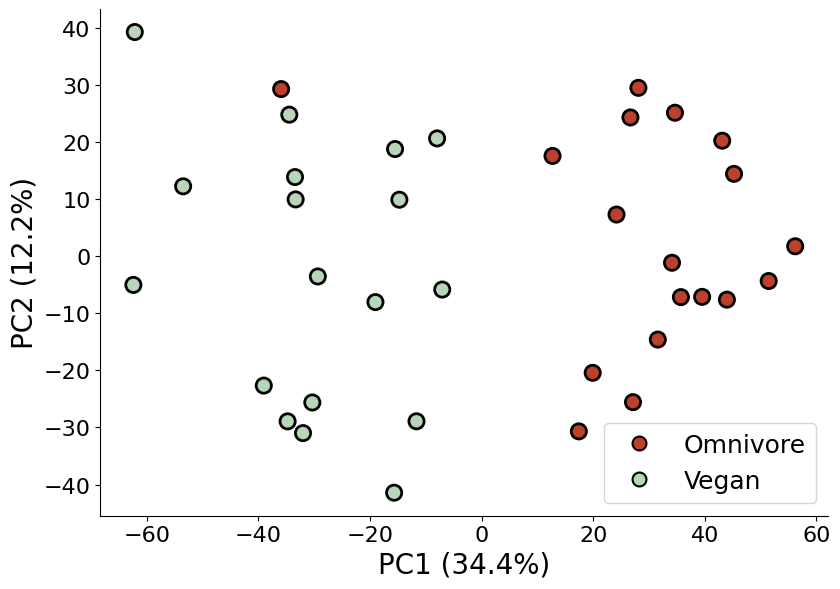

In [21]:
# Initialize visualizer
visualizer = Visualizer(MatplotlibBackend())

# Define custom color palette
custom_palette = {"Vegan": "#B8D5B8", "Omnivore": "#BC412B"}

# Create PCA scatter plot
fig = visualizer.plot_pca_results(
    pca_df,
    explained_variance,
    group_colors=custom_palette,
    figsize=(8.5, 6)
) 

ax = fig.axes[0]

# Customize plot styling
ax.set_title("")  # Remove default title
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

# Set axis labels with variance explained
ax.set_xlabel(f"PC1 ({100*explained_variance[0]:.1f}%)", fontsize=20)
ax.set_ylabel(f"PC2 ({100*explained_variance[1]:.1f}%)", fontsize=20)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Enhance legend appearance
ax.legend(fontsize=18)

# Style scatter points
for collection in ax.collections:
    collection.set_sizes([120])      # Increase point size
    collection.set_edgecolor('black') # Add black edge
    collection.set_linewidth(2.0)     # Set edge width

# Style legend markers
legend = ax.get_legend()
for handle in legend.legend_handles:
    handle.set_markersize(10)
    handle.set_markeredgewidth(1.5)
    handle.set_markeredgecolor('black')

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save as high-resolution vector graphic
#plt.savefig("pca_results.svg", dpi=400, bbox_inches='tight', format='svg')

plt.show()

### PCA

**Clear group separation:**
- Shows distinct metabolic profiles between diets
- PC1 captures the primary dietary distinction (plant vs. animal products)

---

## 7. Sankey Diagram: Hierarchical Food Flows

### Objective
Visualize how RDD counts flow through the hierarchical food ontology, showing relationships between broad categories and specific food types.


- **Node Width**: Proportional to total RDD counts at that ontology level
- **Flow Thickness**: Shows distribution of counts from general to specific categories
- **Colors**: Represent different food ontology branches (if color mapping provided)

### Parameters
- `max_hierarchy_level=3`: Show up to level 3 (broad food categories)
- `color_mapping_file`: Optional CSV defining colors for each ontology branch
- `sample`: Optional sample file can be selected to only visualize the counts for one sample


In [24]:
# Initialize visualizer with Plotly backend for interactive diagrams
visualizer = Visualizer(PlotlyBackend())

# Generate interactive Sankey diagram
visualizer.plot_sankey(
    rdd_food_nist,
    color_mapping_file="../data/sample_type_hierarchy.csv",
    max_hierarchy_level=3
)

**Interactive features:**
- Hover over nodes and flows for exact count values
- Click and drag to rearrange for better visibility
- Use zoom controls for detailed examination

---

## 8. Summary

### Analysis Workflow Completed

✅ **Data Loading**: Successfully retrieved GNPS molecular networking data  
✅ **RDD Generation**: Computed counts across all ontology levels  
✅ **Group Assignment**: Updated samples with diet classifications  
✅ **Proportional Analysis**: Visualized food category differences between groups  
✅ **Multivariate Analysis**: Revealed metabolic clustering by diet in PCA  
✅ **Hierarchical Visualization**: Illustrated food relationships in Sankey diagram  

### Key Findings

Based on the visualizations:
- Distinct metabolic signatures associated with vegan vs. omnivore diets
- Clear differences in RDD proportions for plant-based vs. animal-based categories
- Strong sample clustering by diet group in multivariate space


## References and Resources

**Tools and Databases:**
- GNPS: https://gnps.ucsd.edu/
- RDD Package: [https://github.com/bittremieux-lab/gnps-rdd]

**Citation:**
If you use this workflow in your research, please cite:
```
[publication link]
```

---

**Notebook Information**  
Created: 2025  
Contact: [alejandro.mendozacantu@uantwerpen.be]